In [2]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd

In [3]:
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten
from tensorflow.keras.models import Model
import random as rn
import keras

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [5]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [22]:
input_model_1 = Input(shape=(32,32,3))
flatten = Flatten()(input_model_1)
output_1 = Dense(10)(flatten)
NetA = Model(inputs=input_model_1,outputs=output_1)
NetA.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001, decay=1e-4),metrics=['accuracy'])
history_1=NetA.fit(x=x_train,y=y_train_ohe,validation_data=(x_test, y_test_ohe),epochs=50,batch_size=16)  #,callbacks=[checkpoint,tensorboard_callback])

Epoch 1/50
3125/3125 [==============================] - 6s 2ms/step - loss: 8.6874 - accuracy: 0.0983 - val_loss: 8.3267 - val_accuracy: 0.0938
Epoch 2/50
3125/3125 [==============================] - 6s 2ms/step - loss: 8.3303 - accuracy: 0.0964 - val_loss: 9.0439 - val_accuracy: 0.1058
Epoch 3/50
3125/3125 [==============================] - 6s 2ms/step - loss: 8.5532 - accuracy: 0.1031 - val_loss: 8.0236 - val_accuracy: 0.1034
Epoch 4/50
3125/3125 [==============================] - 6s 2ms/step - loss: 8.0377 - accuracy: 0.1054 - val_loss: 8.0236 - val_accuracy: 0.1034
Epoch 5/50
3125/3125 [==============================] - 6s 2ms/step - loss: 8.0377 - accuracy: 0.1054 - val_loss: 8.0236 - val_accuracy: 0.1034
Epoch 6/50
3125/3125 [==============================] - 6s 2ms/step - loss: 8.0377 - accuracy: 0.1054 - val_loss: 8.0236 - val_accuracy: 0.1034
Epoch 7/50
3125/3125 [==============================] - 6s 2ms/step - loss: 8.0377 - accuracy: 0.1054 - val_loss: 8.0236 - val_accuracy:

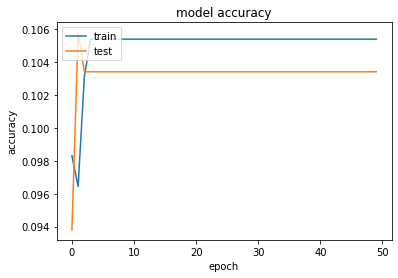

In [23]:
import matplotlib.pyplot as plt

plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
input_model_2 = Input(shape=(32,32,3))
flatten = Flatten()(input_model_2)
dense_2 = Dense(300,activation='relu',kernel_initializer=tf.keras.initializers.HeUniform())(flatten)
output_2=Dense(10,activation='relu')(dense_2)
NetB = Model(inputs=input_model_2,outputs=output_2)
NetB.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001, decay=1e-4),metrics=['accuracy'])
history_2=NetB.fit(x=x_train,y=y_train_ohe,validation_data=(x_test, y_test_ohe),epochs=50,batch_size=16)  #,callbacks=[checkpoint,tensorboard_callback])






Epoch 1/50
3125/3125 [==============================] - 8s 3ms/step - loss: 2.7231 - accuracy: 0.1784 - val_loss: 2.0955 - val_accuracy: 0.2339
Epoch 2/50
3125/3125 [==============================] - 7s 2ms/step - loss: 2.1485 - accuracy: 0.2111 - val_loss: 2.0859 - val_accuracy: 0.2887
Epoch 3/50
3125/3125 [==============================] - 8s 2ms/step - loss: 2.1262 - accuracy: 0.2308 - val_loss: 2.1451 - val_accuracy: 0.1385
Epoch 4/50
3125/3125 [==============================] - 7s 2ms/step - loss: 2.1074 - accuracy: 0.2262 - val_loss: 2.0861 - val_accuracy: 0.2185
Epoch 5/50
3125/3125 [==============================] - 7s 2ms/step - loss: 2.0795 - accuracy: 0.2334 - val_loss: 2.0550 - val_accuracy: 0.2814
Epoch 6/50
3125/3125 [==============================] - 7s 2ms/step - loss: 2.1094 - accuracy: 0.2235 - val_loss: 2.1857 - val_accuracy: 0.1071
Epoch 7/50
3125/3125 [==============================] - 7s 2ms/step - loss: 2.0636 - accuracy: 0.2303 - val_loss: 2.0591 - val_accuracy:

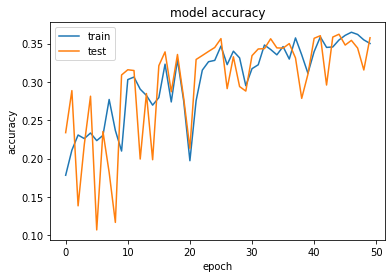

In [26]:
import matplotlib.pyplot as plt

plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
input_model_3 = Input(shape=(32,32,3))
conv=Conv2D(25,5, strides=(1, 1), padding='valid', activation='relu',use_bias=True, kernel_initializer='glorot_uniform')(input_model_3)
max=tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid')(conv)
flatten = Flatten()(max)
dense_3 = Dense(300,activation='relu',kernel_initializer=tf.keras.initializers.HeUniform())(flatten)
output_3=Dense(10, activation='softmax')(dense_3)
NetC = Model(inputs=input_model_3,outputs=output_3)
NetC.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001, decay=1e-4),metrics=['accuracy'])
history_3=NetC.fit(x=x_train,y=y_train_ohe,validation_data=(x_test, y_test_ohe),epochs=50,batch_size=16)  #,callbacks=[checkpoint,tensorboard_callback])



Epoch 1/50
3125/3125 [==============================] - 10s 3ms/step - loss: 3.7166 - accuracy: 0.3219 - val_loss: 1.6909 - val_accuracy: 0.4009
Epoch 2/50
3125/3125 [==============================] - 9s 3ms/step - loss: 1.4774 - accuracy: 0.4736 - val_loss: 1.4667 - val_accuracy: 0.4924
Epoch 3/50
3125/3125 [==============================] - 8s 3ms/step - loss: 1.1921 - accuracy: 0.5806 - val_loss: 1.3417 - val_accuracy: 0.5376
Epoch 4/50
3125/3125 [==============================] - 9s 3ms/step - loss: 0.9659 - accuracy: 0.6623 - val_loss: 1.2958 - val_accuracy: 0.5652
Epoch 5/50
3125/3125 [==============================] - 9s 3ms/step - loss: 0.7696 - accuracy: 0.7336 - val_loss: 1.3313 - val_accuracy: 0.5768
Epoch 6/50
3125/3125 [==============================] - 9s 3ms/step - loss: 0.6118 - accuracy: 0.7951 - val_loss: 1.3665 - val_accuracy: 0.5873
Epoch 7/50
3125/3125 [==============================] - 10s 3ms/step - loss: 0.4763 - accuracy: 0.8466 - val_loss: 1.4300 - val_accurac

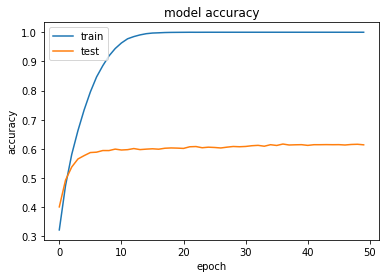

In [28]:
import matplotlib.pyplot as plt

plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
def train(net, x_train,y_train_ohe, x_test, y_test_ohe,num_epochs,learning_rate,compute_accs=True):
  net.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=learning_rate, decay=1e-4),metrics=['accuracy'])
  history=net.fit(x=x_train,y=y_train_ohe,validation_data=(x_test, y_test_ohe),epochs=num_epochs,batch_size=16) 
  train_history=history.history['accuracy']
  test_history=history.history['val_accuracy']
  return train_history,test_history


In [38]:
def plot_history(histories):
  for i in histories:
    plt.plot(i['train_accs'])
    plt.plot(i['test_accs'])
    plt.title(i['name'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()



In [40]:
nets = [NetA, NetB, NetC]
histories = [] 
for net in nets:    
  net_name = type(net).__name__    
  print(f'==== Training {net_name} ====')    
  train_history, test_history = train(net, x_train,y_train_ohe, x_test, y_test_ohe,num_epochs=10,learning_rate=.0001,compute_accs=True)
  histories.append({'name': net_name, 'net': net,'train_accs': train_history, 'test_accs': test_history })
#plot_history(histories)

==== Training Functional ====
Epoch 1/10
3125/3125 [==============================] - 7s 2ms/step - loss: 8.0377 - accuracy: 0.1054 - val_loss: 8.0236 - val_accuracy: 0.1034
Epoch 2/10
3125/3125 [==============================] - 6s 2ms/step - loss: 8.0377 - accuracy: 0.1054 - val_loss: 8.0236 - val_accuracy: 0.1034
Epoch 3/10
3125/3125 [==============================] - 6s 2ms/step - loss: 8.0377 - accuracy: 0.1054 - val_loss: 8.0236 - val_accuracy: 0.1034
Epoch 4/10
3125/3125 [==============================] - 6s 2ms/step - loss: 8.0377 - accuracy: 0.1054 - val_loss: 8.0236 - val_accuracy: 0.1034
Epoch 5/10
3125/3125 [==============================] - 6s 2ms/step - loss: 8.0377 - accuracy: 0.1054 - val_loss: 8.0236 - val_accuracy: 0.1034
Epoch 6/10
3125/3125 [==============================] - 6s 2ms/step - loss: 8.0377 - accuracy: 0.1054 - val_loss: 8.0236 - val_accuracy: 0.1034
Epoch 7/10
3125/3125 [==============================] - 6s 2ms/step - loss: 8.0377 - accuracy: 0.1054 - va

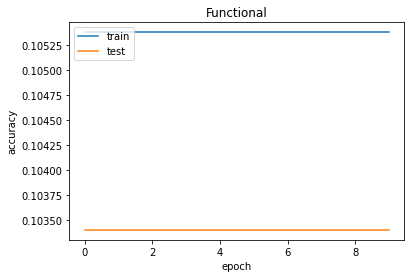

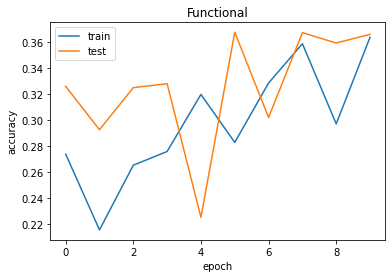

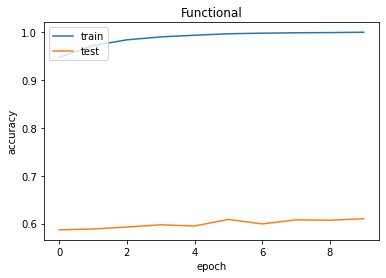

In [41]:
plot_history(histories)